In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
import os
import tqdm

In [4]:
# we will first create a class list to store the labels
labels=['yes','no']

In [5]:
data_dir='data'

In [8]:
# we will augment data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#instantiate the ImageDataGenerator class
datagen = ImageDataGenerator(
        vertical_flip=True,
        horizontal_flip=True,
        fill_mode='nearest')
#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('data/', batch_size=6,target_size=(256,256),
                          save_to_dir='augment/', save_format='jpg'):
    if i==40:
        break
    i+=1
    


Found 155 images belonging to 1 classes.


In [13]:
x=[]
y=[]

In [14]:
for label in os.listdir(data_dir):
    print("\t\t\t\t",label)
    index=labels.index(label)
    for img in os.listdir(os.path.join(data_dir,label)):
        img_path=os.path.join(data_dir,label,img)
        try:
            image=cv.imread(img_path)
            image=cv.resize(image,(256,256))
            x.append(image)
            y.append(index)
        except:
            continue


				 no
				 yes


In [18]:
# convert lists to numpy array and normalizze the values
x_data=np.array(x)/255
y_data=np.array(y)

In [16]:
# split into train,test
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.15)

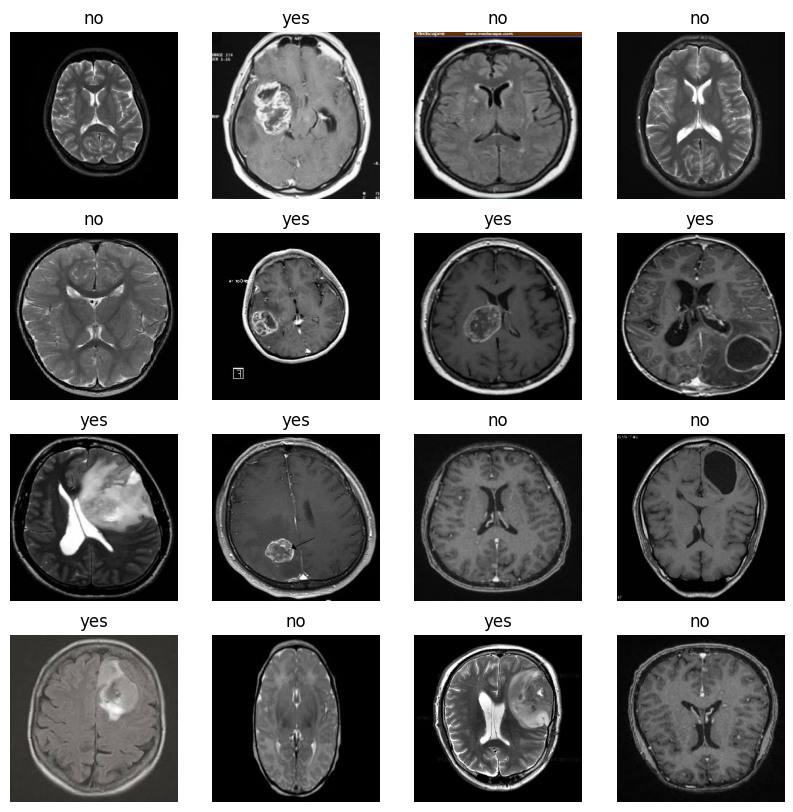

In [28]:
# visualize the images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i+20])
    plt.axis('off')
    plt.title(labels[y_train[i+20]])

In [23]:
# build cnn model
import tensorflow as tf
from tensorflow import keras

In [24]:
len(X_train),len(X_test)

(625, 111)

In [25]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(45,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(30,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
20/20 [==============================] - 65s 3s/step - loss: 0.9571 - accuracy: 0.6816 - val_loss: 0.4502 - val_accuracy: 0.8018
Epoch 2/10
20/20 [==============================] - 56s 3s/step - loss: 0.4319 - accuracy: 0.8080 - val_loss: 0.2882 - val_accuracy: 0.8829
Epoch 3/10
20/20 [==============================] - 53s 3s/step - loss: 0.2259 - accuracy: 0.9152 - val_loss: 0.4242 - val_accuracy: 0.8018
Epoch 4/10
20/20 [==============================] - 50s 2s/step - loss: 0.1144 - accuracy: 0.9648 - val_loss: 0.2058 - val_accuracy: 0.9369
Epoch 5/10
20/20 [==============================] - 51s 3s/step - loss: 0.0315 - accuracy: 0.9936 - val_loss: 0.1619 - val_accuracy: 0.9550
Epoch 6/10
20/20 [==============================] - 57s 3s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1920 - val_accuracy: 0.8919
Epoch 7/10
20/20 [==============================] - 51s 3s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2187 - val_accuracy: 0.9369
Epoch 8/10
 2/20 [==

KeyboardInterrupt: 

In [32]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 2s 545ms/step - loss: 0.2224 - accuracy: 0.9369


[0.22236579656600952, 0.9369369149208069]

In [34]:
model.save('brain_tumor_model.keras')

In [35]:
# build reports

In [36]:
y_p=model.predict(X_test)
y_p

4/4 [==============================] - 2s 501ms/step


array([[1.5331061e-04, 9.9984670e-01],
       [1.5771655e-05, 9.9998426e-01],
       [8.9154503e-04, 9.9910849e-01],
       [5.3319144e-01, 4.6680859e-01],
       [9.9721342e-01, 2.7865772e-03],
       [9.9991906e-01, 8.0929509e-05],
       [8.4449581e-05, 9.9991560e-01],
       [9.9004316e-01, 9.9567985e-03],
       [6.7228853e-04, 9.9932778e-01],
       [9.9949670e-01, 5.0323864e-04],
       [2.4021470e-05, 9.9997592e-01],
       [1.1049481e-03, 9.9889511e-01],
       [2.8441198e-06, 9.9999714e-01],
       [9.9992585e-01, 7.4192678e-05],
       [9.9788851e-01, 2.1114836e-03],
       [9.9989736e-01, 1.0267857e-04],
       [9.9731869e-01, 2.6813350e-03],
       [9.9743050e-01, 2.5694843e-03],
       [1.1618921e-06, 9.9999881e-01],
       [1.2892302e-05, 9.9998713e-01],
       [1.5741731e-03, 9.9842584e-01],
       [9.9999726e-01, 2.7596855e-06],
       [9.9996185e-01, 3.8185175e-05],
       [7.7372044e-01, 2.2627960e-01],
       [2.5146908e-06, 9.9999750e-01],
       [9.9996328e-01, 3.

In [51]:
def give_predictions(y_p):
    l=[]
    for i in y_p:
        l.append(np.argmax(i))
    return l   


In [52]:
y_predicted=give_predictions(y_p)

In [54]:
cm=tf.math.confusion_matrix(y_test,y_predicted)

In [55]:
import seaborn
from sklearn.metrics import classification_report

Text(50.722222222222214, 0.5, 'y_true')

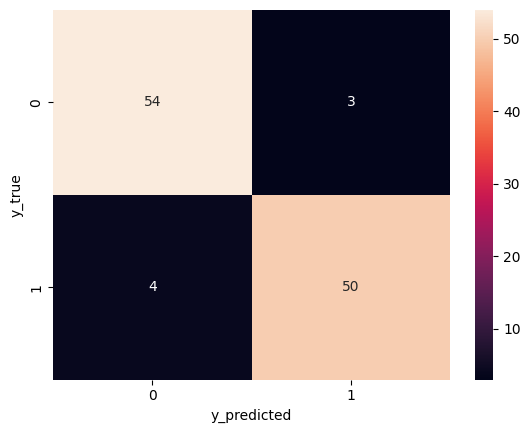

In [60]:
seaborn.heatmap(cm,annot=True,)
plt.xlabel('y_predicted')
plt.ylabel('y_true')

In [61]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.94      0.93      0.93        54

    accuracy                           0.94       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.94      0.94      0.94       111



In [69]:
def give_label(arr):
    
    print(labels[np.argmax(arr[0])])

In [70]:
give_label(y_pre)

no


In [82]:
# create a pipeline such that user can enter image and our model will classify
img=cv.imread('yes1.png')
img=cv.resize(img,(256,256))
img=img/255
y_pre=model.predict(
    np.expand_dims(img,0)
    )
give_label(y_pre)

1/1 [==============================] - 0s 46ms/step
yes


In [78]:
X_train[0].max()

1.0